In [19]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [20]:
#Import Women Means Data
Women_df = pd.read_csv('Women_Means_Dataset.csv')
Women_df

,Formal_Education,Position,Years_Coding,Salary,Age
0,3.839506,3.814815,3.197531,22663.080247,19.5
1,4.387805,3.407317,3.409756,21676.941463,23.0
2,4.751055,2.976793,4.496835,41599.448312,27.0
3,4.998721,2.561381,6.695652,53419.576726,32.0
4,5.038697,3.028513,8.930754,62256.127291,37.0
5,5.054131,2.954416,9.760684,64228.849003,42.0
6,4.497585,3.072464,10.748792,69869.065217,47.0
7,5.088235,3.227941,10.970588,62942.514706,52.0
8,4.875000,2.812500,10.781250,99460.437500,57.0
9,5.186047,3.418605,12.255814,101720.453488,64.5


In [21]:
#Import Men Means Data
Men_df = pd.read_csv('Men_Means_Dataset.csv')
Men_df

,Formal_Education,Position,Years_Coding,Salary,Age
0,3.950119,3.505938,3.356295,26373.016627,19.5
1,4.358566,3.530323,3.474989,24580.509739,23.0
2,4.624508,3.170928,4.844807,38902.087628,27.0
3,4.754254,3.093474,7.292053,57561.585397,32.0
4,4.811253,3.076213,9.466806,67868.586186,37.0
5,4.754266,3.336177,10.841297,76011.878200,42.0
6,4.586930,3.593711,11.158446,78144.234279,47.0
7,4.728092,3.459459,12.529894,87293.935708,52.0
8,4.751445,3.527457,13.036127,97674.731936,57.0
9,4.756933,3.812398,13.765090,95371.452692,64.5


In [22]:
Women_X = Women_df[['Age','Years_Coding','Formal_Education']]
Women_X

,Age,Years_Coding,Formal_Education
0,19.5,3.197531,3.839506
1,23.0,3.409756,4.387805
2,27.0,4.496835,4.751055
3,32.0,6.695652,4.998721
4,37.0,8.930754,5.038697
5,42.0,9.760684,5.054131
6,47.0,10.748792,4.497585
7,52.0,10.970588,5.088235
8,57.0,10.781250,4.875000
9,64.5,12.255814,5.186047


In [23]:
Men_X = Men_df[['Age', 'Years_Coding','Formal_Education']]
Men_X

,Age,Years_Coding,Formal_Education
0,19.5,3.356295,3.950119
1,23.0,3.474989,4.358566
2,27.0,4.844807,4.624508
3,32.0,7.292053,4.754254
4,37.0,9.466806,4.811253
5,42.0,10.841297,4.754266
6,47.0,11.158446,4.586930
7,52.0,12.529894,4.728092
8,57.0,13.036127,4.751445
9,64.5,13.765090,4.756933


In [24]:
Women_Y = Women_df['Salary']
Men_Y = Men_df['Salary']

In [25]:
from sklearn.model_selection import train_test_split
Women_X_train, Women_X_test, Women_y_train, Women_y_test = train_test_split(Women_X, Women_Y, test_size=0.25, random_state=101)
print(Women_X_train.shape)
print(Women_X_test.shape)
print(Women_y_train.shape)
print(Women_y_test.shape)

(7, 3)
(3, 3)
(7,)
(3,)


In [26]:
from sklearn.model_selection import train_test_split
Men_X_train, Men_X_test, Men_y_train, Men_y_test = train_test_split(Men_X, Men_Y, test_size=0.25, random_state=101)
print(Men_X_train.shape)
print(Men_X_test.shape)
print(Men_y_train.shape)
print(Men_y_test.shape)

(7, 3)
(3, 3)
(7,)
(3,)


In [27]:
from sklearn.linear_model import LinearRegression
Women_model = LinearRegression()
Women_model.fit(Women_X_train,Women_y_train)

LinearRegression()

In [28]:
from sklearn.linear_model import LinearRegression
Men_model = LinearRegression()
Men_model.fit(Men_X_train,Men_y_train)

LinearRegression()

In [29]:
# print the intercept
print(Women_model.intercept_)

-55356.187023302955


In [30]:
# print the intercept
print(Men_model.intercept_)

-67770.4963152595


In [31]:
Women_predictions = Women_model.predict(Women_X_test)
Women_predictions

array([80406.80779984, 35030.1070086 , 14406.81703635])

In [32]:
Men_predictions = Men_model.predict(Men_X_test)
Men_predictions

array([90970.05265117, 38261.8100628 , 17920.74011272])

<AxesSubplot:xlabel='Salary'>

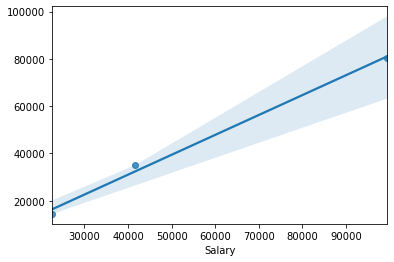

In [33]:
sns.regplot(Women_y_test,Women_predictions)

<AxesSubplot:xlabel='Salary'>

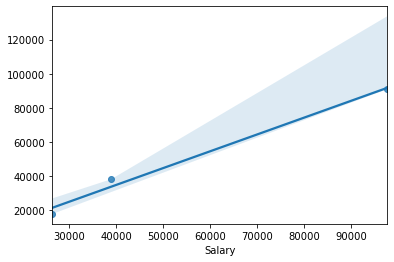

In [34]:
sns.regplot(Men_y_test,Men_predictions)

In [35]:
import statsmodels.api as sm
Woemn_X_train_Sm= sm.add_constant(Women_X_train)
Women_X_train_Sm= sm.add_constant(Women_X_train)
ls=sm.OLS(Women_y_train,Women_X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     8.411
Date:                Fri, 16 Jul 2021   Prob (F-statistic):             0.0569
Time:                        15:40:16   Log-Likelihood:                -72.032
No. Observations:                   7   AIC:                             152.1
Df Residuals:                       3   BIC:                             151.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.536e+04    7.7e+04  

In [36]:
import statsmodels.api as sm
Men_X_train_Sm= sm.add_constant(Men_X_train)
Men_X_train_Sm= sm.add_constant(Men_X_train)
ls=sm.OLS(Men_y_train,Men_X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     256.5
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           0.000410
Time:                        15:40:16   Log-Likelihood:                -60.367
No. Observations:                   7   AIC:                             128.7
Df Residuals:                       3   BIC:                             128.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.777e+04   3.92e+04  